In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [2]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/TGMT'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['Models', 'Data', 'imgface.jpg']

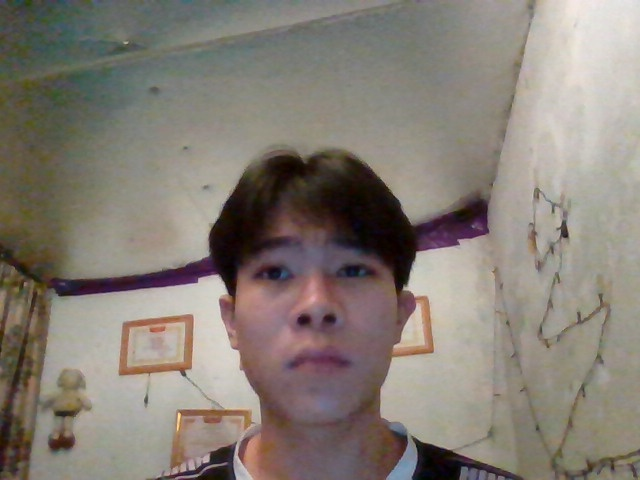

In [4]:
# Hiển thị một ảnh
img = cv2.imread(path + "/imgface.jpg")
cv2_imshow(img)

-0.0161074
0.083657
-0.00323422
-0.0750234
-0.0631186
-0.0363363
-0.0233797
-0.124475
0.179574
-0.0831678
0.235335
-0.060885
-0.137692
-0.0875269
0.00178779
0.109587
-0.168698
-0.0786467
-0.0101901
0.00349335
0.105151
0.0547212
0.0235622
0.073696
-0.0697887
-0.283243
-0.16172
-0.114941
0.109151
-0.0817749
-0.0687988
0.0122084
-0.175042
-0.0967235
0.073424
0.0474959
-0.0230628
-0.0551264
0.161923
0.0043855
-0.197233
0.107504
0.0677333
0.213437
0.149819
0.0925668
-0.0307375
-0.167566
0.0921973
-0.0607526
0.116897
0.123726
0.105651
0.0864299
0.00932364
-0.137299
0.0404166
0.0900204
-0.207099
0.0447553
0.0984187
-0.0342823
-0.0067067
-0.0103804
0.172861
0.0706437
-0.0670412
-0.236116
0.073923
-0.192321
-0.10049
0.1203
-0.133366
-0.147114
-0.205958
0.0262375
0.370152
0.110719
-0.187452
0.0772504
-0.0533278
-0.061691
0.142042
0.12122
-0.00182499
0.0190931
-0.0539561
-0.0112181
0.207101
-0.0544427
-0.0284301
0.248247
-0.0125757
0.0818451
0.0312942
-0.0191954
-0.0429778
0.0499163
-0.10503
-0.0

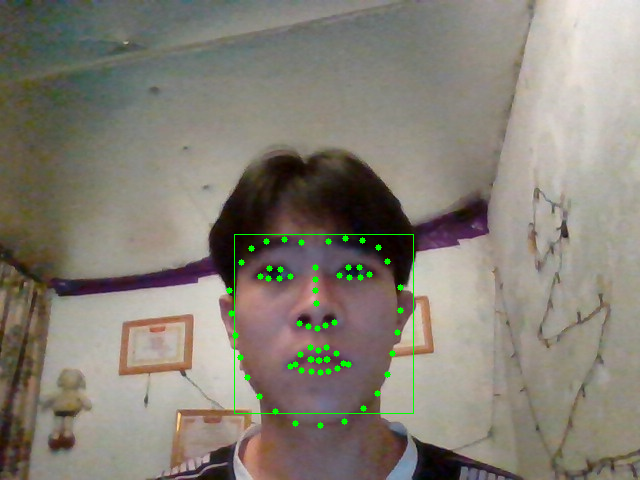

In [7]:
face_landmarks_model_path = "/content/drive/MyDrive/TGMT/Models/shape_predictor_68_face_landmarks.dat"
face_recognition_model_path = "/content/drive/MyDrive/TGMT/Models/dlib_face_recognition_resnet_model_v1.dat"
img_path = "/content/drive/MyDrive/TGMT/imgface.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

    # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)

    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

    # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)